In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
digitroot = "C:/Users/kpangalu/Downloads/Data_Preparation/gun_data_preparation/digit_images/"
# digitroot = "C:/Users/kpangalu/Downloads/Data_Preparation/gun_data_preparation/trial/"
backroot = "C:/Users/kpangalu/Downloads/Data_Preparation/gun_data_preparation/background/"

dataroot = "C:/Users/kpangalu/Downloads/Data_Preparation/gun_data_preparation/Syntheticdata/trial/"

27

[['digit_0a.jpg', 'digit_0b.jpg', 'digit_0c.jpg', 'digit_0d.jpg'],
 ['digit_1a.jpg', 'digit_1b.jpg', 'digit_1c.jpg', 'digit_1d.jpg']]

0 0


'C:/Users/kpangalu/Downloads/Data_Preparation/gun_data_preparation/trial/0/digit_0d.jpg'

'digit_im: (13, 7, 3)'

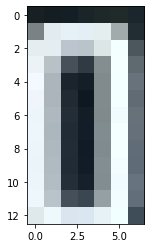

'back_im: (14, 24, 3)'

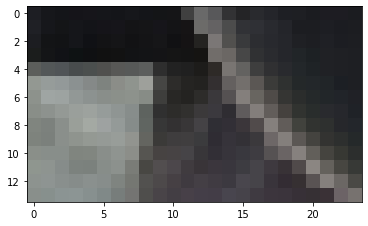

'darkratio : 0.6060265732342704'

'maxgap: 6'

'darklen: 13'

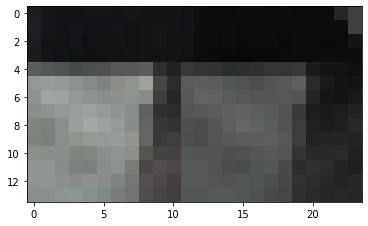

'mingap: 3, maxgap: 6'

'offset_j = 2,  offset_i = 0'

'jstart : 11'

'height = 13, width=20'

0 13
11 20


(14, 24, 3)

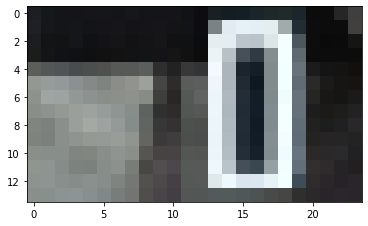

'_______________________________________________________________'

0 1


'C:/Users/kpangalu/Downloads/Data_Preparation/gun_data_preparation/trial/0/digit_0b.jpg'

'digit_im: (13, 7, 3)'

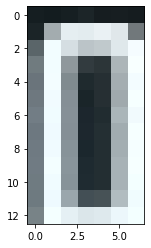

'back_im: (14, 24, 3)'

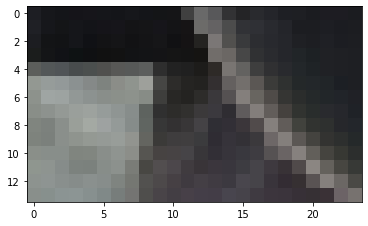

'darkratio : 0.6569611807872577'

'maxgap: 6'

'darklen: 13'

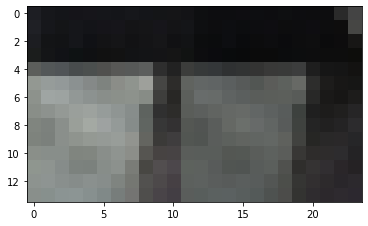

'mingap: 3, maxgap: 6'

'offset_j = 0,  offset_i = 1'

'jstart : 11'

'height = 14, width=18'

1 14
11 18


(14, 24, 3)

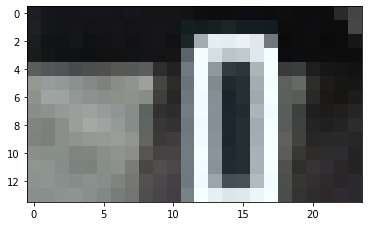

'_______________________________________________________________'

In [3]:
#background image files
fileset4back = os.listdir(backroot)
display(len(fileset4back))
fileset4digit = []

for i in range(10):
    fileset4digit.append(os.listdir(digitroot + str(i)))
display(fileset4digit)

imshape = [14, 24]

NumSmp = 10

for digit in range(0, 9):
    
    for smpindex in range(NumSmp):
        print(digit,smpindex)
        #concatenating the digits
        digitStr = str(digit)
        for dindex in range(len(digitStr)):
            #display(dindex)
            seldigitfname = digitroot+digitStr[dindex] + '/' + np.random.choice(fileset4digit[int(digitStr[dindex])])
            display(seldigitfname)
            
            if dindex == 0:
                digit_im = cv2.imread(seldigitfname)
            else:
                tmp_im = cv2.imread(seldigitfname)
                digit_im = np.concatenate((digit_im, tmp_im), axis=1)
            display("digit_im: {}".format(digit_im.shape))
            #plt.figure(figsize = (13, 7))
            plt.imshow(digit_im)
            plt.show()
            
        #load background image
        fname4back = backroot + np.random.choice(fileset4back)
        back_im = cv2.imread(fname4back)
        display("back_im: {}". format(back_im.shape))
        plt.imshow(back_im)
        plt.show()
        
        #darkening background image
        darkratio = 0.6 + np.random.rand(1)[0]/10
        display('darkratio : {}'.format(darkratio))  
        maxgap = min(6, abs(back_im.shape[1] - digit_im.shape[1]))
        display('maxgap: {}'.format(maxgap))
        
        darklen = min(imshape[1], digit_im.shape[1] + maxgap)
        display('darklen: {}'.format(darklen))
        back_im[:, -darklen:, :] = back_im[:,0:darklen,:]*darkratio
        plt.imshow(back_im)
        plt.show()
        
        mingap = maxgap//2
        display('mingap: {}, maxgap: {}'.format(mingap, maxgap))
        offset_j = np.random.choice(np.arange(maxgap - mingap))
        offset_i = np.random.choice(np.arange(maxgap - mingap))
        if offset_i > 1 :
            offset_i = np.random.choice(np.arange(0, 2))
        else:
            offset_i = offset_i
        display("offset_j = {},  offset_i = {}".format(offset_j, offset_i))
        
        #compose number with background
        im_comp = back_im.copy()
        #jstart = back_im.shape[1] - darklen + mingap
        jstart = back_im.shape[1] - darklen 
        display('jstart : {}'.format(jstart))
        #display("xx = {}, yy={}". format(digit_im.shape[0], digit_im.shape[1]))
        display("height = {}, width={}". format(offset_i+digit_im.shape[0], jstart+offset_j+digit_im.shape[1]))
        display("vertical start-end: {}, {}".format(offset_i,offset_i+digit_im.shape[0]))
        display("Horizontal start-end: {}, {}".format(jstart,jstart+offset_j+digit_im.shape[1]))
        im_comp[offset_i:offset_i+digit_im.shape[0], jstart+offset_j:jstart+offset_j+digit_im.shape[1], :] = digit_im
        display(im_comp.shape)
        plt.imshow(im_comp)
        plt.show()
        
        #save the generated image
#         pre = '000'
#         fname4data = dataroot + pre[0:3-len(digitStr)] + digitStr + '_{}.png'.format(str(smpindex))
#         cv2.imwrite(fname4data, im_comp)
        
        
        display("_______________________________________________________________")
        


In [4]:
import numpy as np
for i in range(0,10):
    res = np.random.choice(np.arange(0, 2))
    print(res)

1
0
0
1
0
0
0
0
1
0
